In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data_Analysis /Hackathon/googleplaystore.csv', encoding = 'latin')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
df['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [21]:
df['Installs'] = df['Installs'].apply(lambda a :a.replace("+","").replace(",","").replace("Free","0")).astype('int')

In [22]:
df.describe()

,Rating,Installs
count,9367.000000,1.084100e+04
mean,4.193338,1.546291e+07
std,0.537431,8.502557e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,5.000000e+06
max,19.000000,1.000000e+09


In [23]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())


In [24]:
df['Rating'] = df['Rating'].replace(19.000000,df['Rating'].mean())

In [25]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [26]:
df['Reviews'] = df['Reviews'].replace('3.0','3')

In [44]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce').astype('Int64')

In [27]:
df['Size'] = df['Size'].apply(lambda a :a.replace("M","").replace("Varies with device","0").replace("k","").replace("+","").replace(",","")).astype('float')

In [28]:
df['Type'] = df['Type'].replace("0","Free")

In [29]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df['Price'] = df['Price'].apply(lambda a :a.replace("$",""))

In [31]:
df['Price'] =df['Price'].apply(lambda a :a.replace("Everyone","0")).astype('float')

In [32]:
df['Price'].value_counts()

,count
Price,
0.00,10041
0.99,148
2.99,129
1.99,73
4.99,72
...,...
19.90,1
1.75,1
14.00,1


In [33]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors = 'coerce')

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [35]:
df.to_csv('Cleanedhack.csv')

#EDA

In [36]:
#category wise rating
category_wise_rating = df.groupby('Category')['Rating'].sum().sort_values(ascending = False).reset_index().head(7)

In [37]:
fig = px.bar(category_wise_rating,x = 'Category', y = 'Rating')
fig.show()

Family category is the highest rated category

In [38]:
category_wise_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index().head(7)

In [39]:
fig = px.bar(category_wise_installs,x = 'Category', y = 'Installs')
fig.show()

<ipython-input-40-60e199e592eb>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




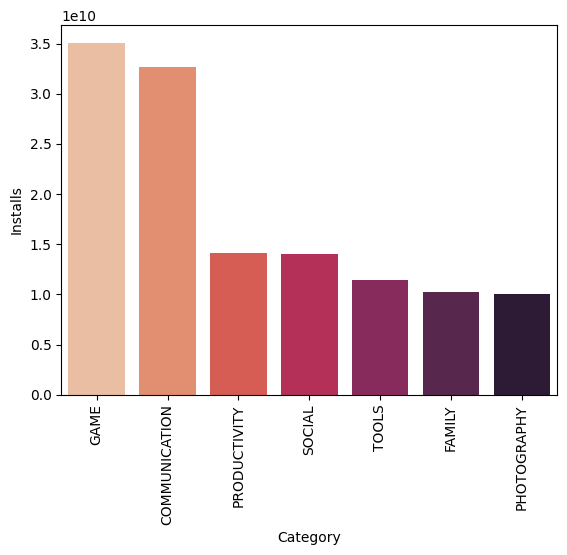

In [40]:
sns.barplot(data = category_wise_installs, x = 'Category', y = 'Installs', palette = 'rocket_r')
plt.xticks(rotation = 90)
plt.show()

Game category has hightest installations followed by communication category


In [41]:
app_wise_installs = df.groupby('App')['Installs'].sum().sort_values(ascending = False).reset_index().head(7)

<ipython-input-42-5fae45ae7690>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




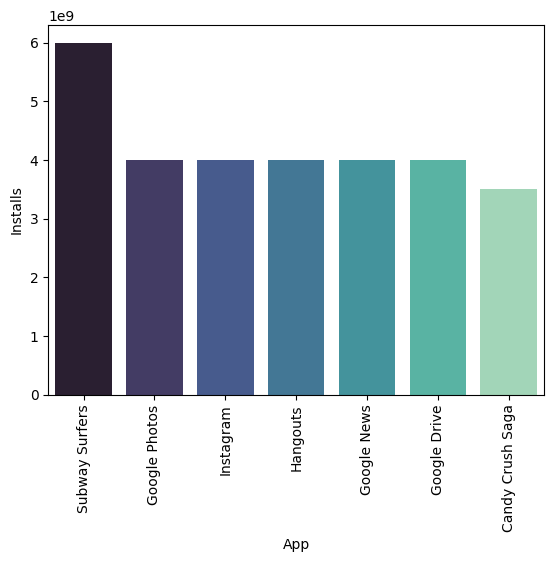

In [42]:
sns.barplot(data = app_wise_installs, x = 'App', y = 'Installs', palette = 'mako')
plt.xticks(rotation = 90)
plt.show()

Subway surfers has the maximun installs

In [45]:
fig=px.scatter(df,x='Rating', y='Installs')
fig.show()

The apps with high ratings are mostly with maximum installs

In [46]:
fig=px.scatter(df,x='Rating', y='Reviews')
fig.show()

The apps with high ratings have high number of reviews

<ipython-input-47-d06321f9b3a3>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




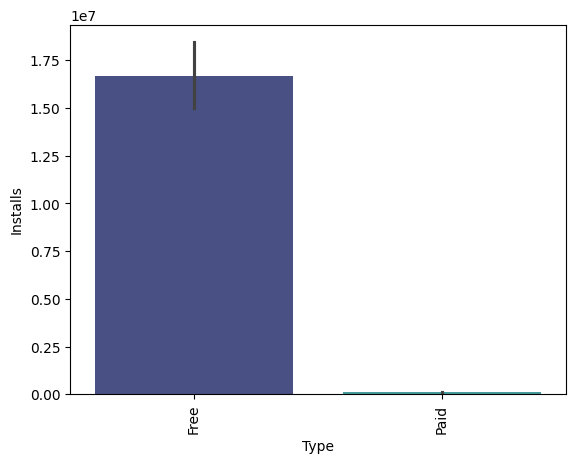

In [47]:
sns.barplot(data = df, x = 'Type', y = 'Installs', palette = 'mako')
plt.xticks(rotation = 90)
plt.show()

From the above barplot we can say that free apps are more installed as compared to paid apps

In [49]:
df.to_csv('Cleanedhack2.csv')

##Conclusion
1. Free Apps have high installments as compared to the paid apps making it difficult for paid apps to aim for high insatllations.
2. Apps with Game category are installed more, indicating that the apps with this category are widely enjoyed by people.
3. Apps with Family followed by Game category are highly rated.